In [1]:
# Importing nrcessary liberaries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt


In [2]:
# Read the anonymised filltered excel file
AirShipments_DK = pd.read_excel (r"C:\Users\emana\Documents\My Graduation project-DA-Redi\anonymized_air_shipments.xlsx")

In [3]:
# CHECK
AirShipments_DK.head(6)

,ShipmentNo,TransportMode,ContainerMode,ServiceLevelDescription,CarrierName,OriginCountry,DestinationCountry,ETD,ETA,LeadtimeService,AgreedLeadtime,AgreedVsActualLeadtime,Ontime,DeviationCode,ReasonCode,DeviationText,DeviationCreatedDate,Currency_Code,Total Amount
0,SH.0001,AIR,LSE,AirSave Door to Door,Airline_1,Denmark,Japan,2022-01-20,2022-01-21,8,10,-2,Y,-,-,-,-,GBP,296.022903
1,SH.0002,AIR,LSE,AirSave Door to Airport,Airline_2,Denmark,United States,2022-01-19,2022-01-19,1,8,-7,Y,-,-,-,-,GBP,548.204688
2,SH.0003,AIR,LSE,AirFast Door to Door,Airline_3,Denmark,Serbia,2022-01-03,2022-01-03,-,7,-,N,Deviation: 01 - Shipper/Supplier,Human Error,Missing ELI labels,2021-12-30 14:02:00,GBP,932.883991
3,SH.0004,AIR,LSE,AirSave Door to Airport,Airline_4,Denmark,United States,2022-01-29,2022-01-29,-2,8,-10,Y,-,-,-,-,GBP,1478.144958
4,SH.0005,AIR,LSE,AirSave Door to Door,Airline_1,Denmark,Japan,2022-01-27,2022-01-28,7,10,-3,Y,-,-,-,-,GBP,493.881505
5,SH.0006,AIR,LSE,AirSave Door to Door,Airline_1,Denmark,Japan,2022-01-29,2022-01-30,4,10,-6,Y,-,-,-,-,GBP,571.519639


In [4]:
print(AirShipments_DK.describe())

                                 ETD                            ETA  \
count                            955                            955   
mean   2022-07-11 23:50:57.172774912  2022-07-14 06:50:08.167539456   
min              2022-01-02 00:00:00            2022-01-02 00:00:00   
25%              2022-04-21 00:00:00            2022-04-22 12:00:00   
50%              2022-07-13 00:00:00            2022-07-15 00:00:00   
75%              2022-10-07 00:00:00            2022-10-08 12:00:00   
max              2022-12-31 00:00:00            2023-01-05 00:00:00   
std                              NaN                            NaN   

       Total Amount   
count     955.000000  
mean      595.167808  
min       -25.762233  
25%       356.144205  
50%       480.188033  
75%       679.216946  
max      5201.004083  
std       442.043897  


In [5]:
# Information about data types and missing values
print(AirShipments_DK.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ShipmentNo               955 non-null    object        
 1   TransportMode            955 non-null    object        
 2   ContainerMode            955 non-null    object        
 3   ServiceLevelDescription  955 non-null    object        
 4   CarrierName              955 non-null    object        
 5   OriginCountry            955 non-null    object        
 6   DestinationCountry       955 non-null    object        
 7   ETD                      955 non-null    datetime64[ns]
 8   ETA                      955 non-null    datetime64[ns]
 9   LeadtimeService          955 non-null    object        
 10  AgreedLeadtime           955 non-null    object        
 11  AgreedVsActualLeadtime   955 non-null    object        
 12  Ontime                   955 non-nul

In [6]:
# Check for missing values

print(AirShipments_DK.isnull().sum ())

ShipmentNo                  0
TransportMode               0
ContainerMode               0
ServiceLevelDescription     0
CarrierName                 0
OriginCountry               0
DestinationCountry          0
ETD                         0
ETA                         0
LeadtimeService             0
AgreedLeadtime              0
AgreedVsActualLeadtime      0
Ontime                      0
DeviationCode               0
ReasonCode                  0
DeviationText              27
DeviationCreatedDate        0
Currency_Code               0
Total Amount                0
dtype: int64


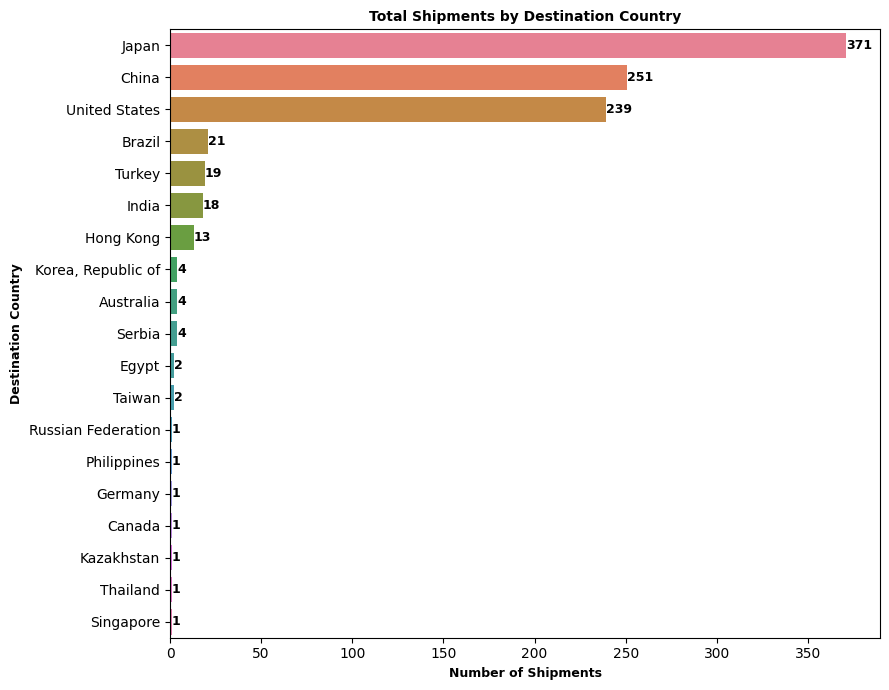

In [7]:

# The number of shipments per  Destination Country

# Distribution by Destination Country
destination_country_summary = AirShipments_DK['DestinationCountry'].value_counts().reset_index()
destination_country_summary.columns = ['DestinationCountry', 'ShipmentCount']

# Size of plot
plt.figure(figsize=(9, 7))
# Colour of vis
sns.set_palette("colorblind")

# Bar chart for the number of shipments per Destination country
sns.barplot(x='ShipmentCount', y='DestinationCountry', data=destination_country_summary, hue='DestinationCountry', dodge=False, legend=False)

# titles, labels and font size
plt.title('Total Shipments by Destination Country', fontsize=10, fontweight='bold')
plt.xlabel('Number of Shipments', fontsize=9, fontweight='bold')
plt.ylabel('Destination Country', fontsize=9, fontweight='bold')

# adding values to the bars
for index, value in enumerate(destination_country_summary['ShipmentCount']):
    plt.text(value, index, str(value), va='center', ha='left', fontsize=9, color='black',fontweight='bold')

plt.tight_layout()
plt.show()

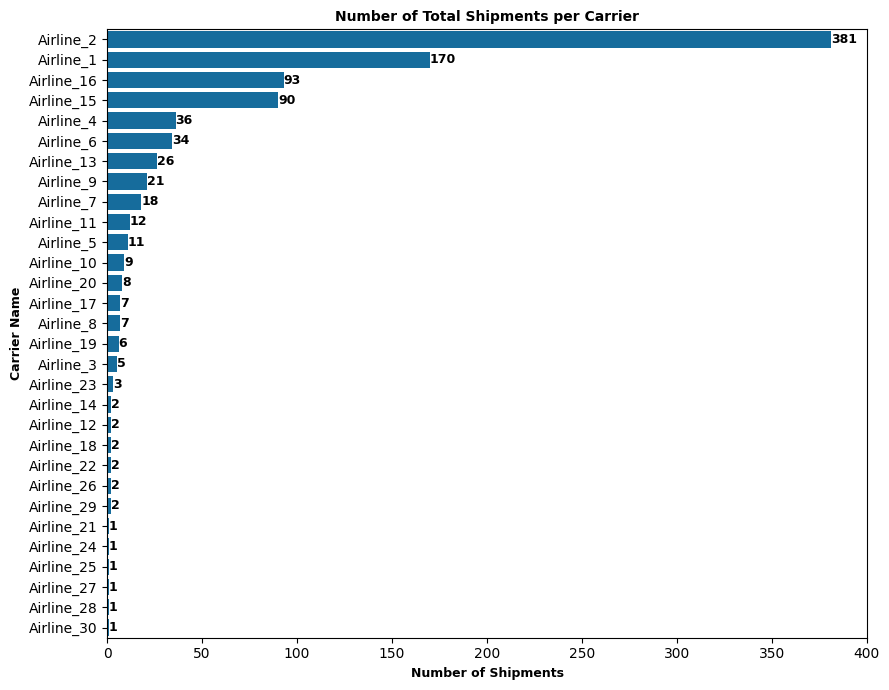

In [8]:
# the number of shipments per carrier
carrier_summary = AirShipments_DK['CarrierName'].value_counts().reset_index()
carrier_summary.columns = ['CarrierName', 'ShipmentCount']

# size of the plot
plt.figure(figsize=(9, 7))

# Chart of shipments per carrier
sns.set_palette(["#0072B2"])  
sns.barplot(x='ShipmentCount', y='CarrierName', data=carrier_summary, dodge=False, legend=False)

#  titles and labels
plt.title('Number of Total Shipments per Carrier', fontsize=10, fontweight='bold')
plt.xlabel('Number of Shipments', fontsize=9,fontweight='bold')
plt.ylabel('Carrier Name', fontsize=9,fontweight='bold')

# values on the bars
for index, value in enumerate(carrier_summary['ShipmentCount']):
    plt.text(value, index, str(value), va='center', ha='left', fontsize=9, color='black',fontweight='bold')

plt.tight_layout()
plt.show()



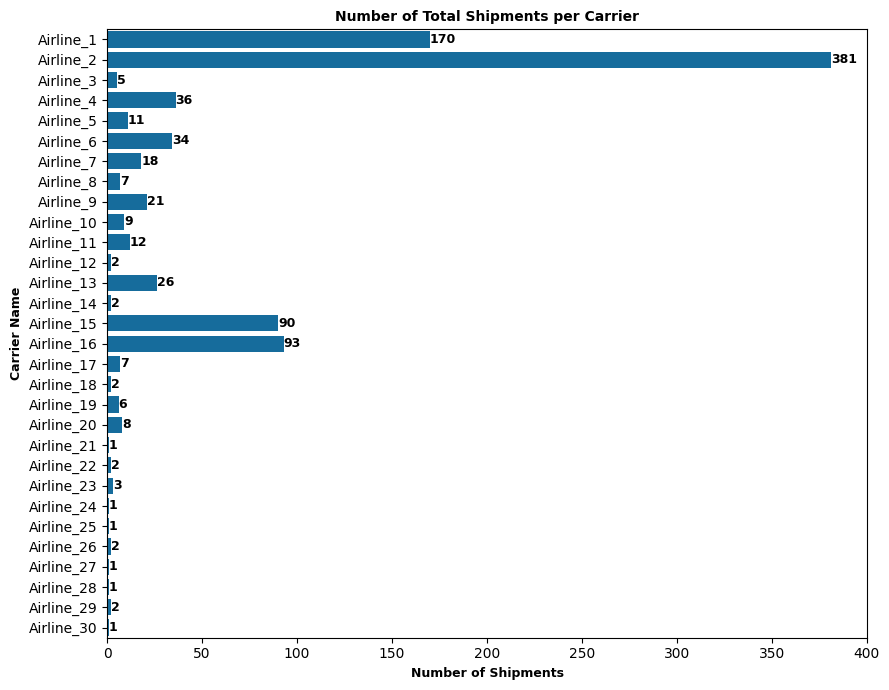

In [9]:
# Number of shipments per carrier
carrier_summary = AirShipments_DK['CarrierName'].value_counts().reset_index()
carrier_summary.columns = ['CarrierName', 'ShipmentCount']

# Extract numbers from CarrierName for proper sorting
carrier_summary['CarrierNumber'] = carrier_summary['CarrierName'].str.extract(r'(\d+)').astype(int)

# Sort the dataframe by CarrierNumber
carrier_summary = carrier_summary.sort_values(by='CarrierNumber')

# Size of the plot
plt.figure(figsize=(9, 7))

# Chart of shipments per carrier
sns.set_palette(["#0072B2"])
sns.barplot(x='ShipmentCount', y='CarrierName', data=carrier_summary, dodge=False, legend=False)

# Titles and labels
plt.title('Number of Total Shipments per Carrier', fontsize=10, fontweight='bold')
plt.xlabel('Number of Shipments', fontsize=9, fontweight='bold')
plt.ylabel('Carrier Name', fontsize=9, fontweight='bold')

# Values on the bars
for index, value in enumerate(carrier_summary['ShipmentCount']):
    plt.text(value, index, str(value), va='center', ha='left', fontsize=9, color='black', fontweight='bold')

plt.tight_layout()
plt.show()


In [10]:
# Convert 'Y' and 'N' to boolean values
AirShipments_DK['Ontime'] = AirShipments_DK['Ontime'].map({'Y': True, 'N': False})


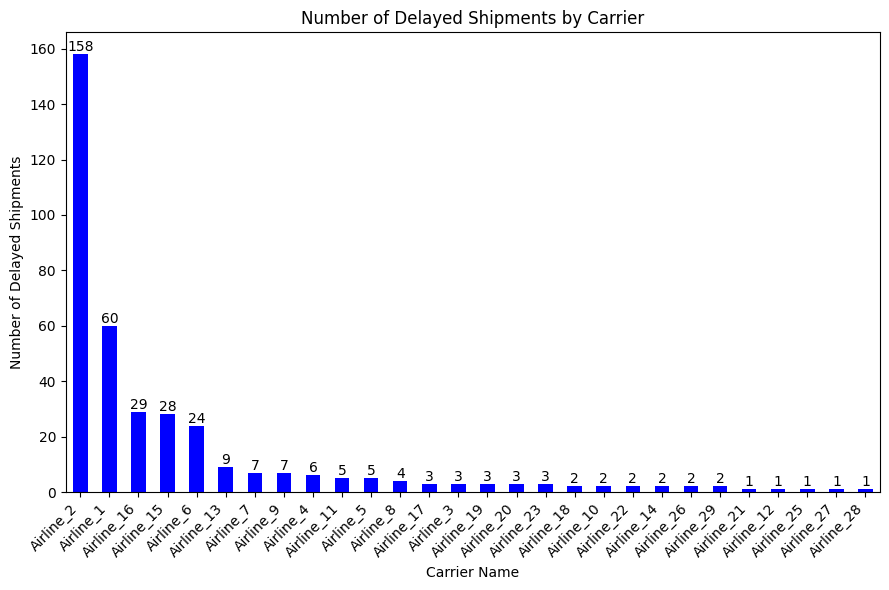

In [11]:
# Filtering dataset to include only delayed shipments
delayed_shipments = AirShipments_DK[~AirShipments_DK['Ontime']]

# number of delayed shipments for each carrier
delayed_shipments_count = delayed_shipments['CarrierName'].value_counts()

# carriers and delayed shipments
delayed_shipments_count = delayed_shipments_count.sort_values(ascending=False)

#  bar chart
plt.figure(figsize=(9, 6))
delayed_shipments_count.plot(kind='bar', color='blue')
plt.title('Number of Delayed Shipments by Carrier')
plt.xlabel('Carrier Name')
plt.ylabel('Number of Delayed Shipments')

#values
for i, count in enumerate(delayed_shipments_count):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<Figure size 900x700 with 0 Axes>

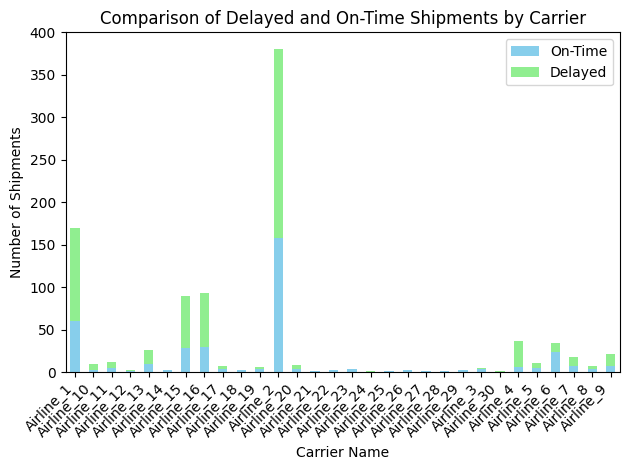

In [12]:
# Calculate the number of delayed and on-time shipments for each carrier
shipment_counts = AirShipments_DK.groupby(['CarrierName', 'Ontime']).size().unstack(fill_value=0)

# Plot the grouped bar chart
plt.figure(figsize=(9, 7))
shipment_counts.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen'])
plt.title('Comparison of Delayed and On-Time Shipments by Carrier')
plt.xlabel('Carrier Name')
plt.ylabel('Number of Shipments')
plt.legend(['On-Time', 'Delayed'], loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


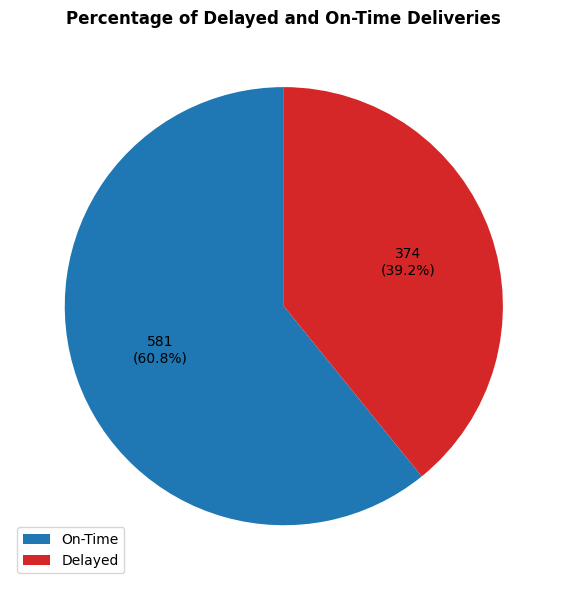

In [13]:
# the total count of delayed and on-time shipments
total_shipments_count = AirShipments_DK['Ontime'].value_counts()

#  the percentage of delayed and on-time shipments
percentage_ontime = (total_shipments_count[True] / AirShipments_DK.shape[0]) * 100
percentage_delayed = (total_shipments_count[False] / AirShipments_DK.shape[0]) * 100

# Plot the pie chart
plt.figure(figsize=(8, 6))
pie_colors = ['#1f77b4','#d62728'] 

# pie chart
patches, texts, autotexts = plt.pie(total_shipments_count, autopct='%1.1f%%', colors=pie_colors, startangle=90)

# total number and percentage text for each category
total_delayed = total_shipments_count[False]
total_ontime = total_shipments_count[True]
autotexts[0].set_text(f'{total_ontime}\n({percentage_ontime:.1f}%)')
autotexts[1].set_text(f'{total_delayed}\n({percentage_delayed:.1f}%)')

#legend
plt.legend(patches, ['On-Time','Delayed' ], loc='lower left')

#title
plt.title('Percentage of Delayed and On-Time Deliveries',fontweight='bold')

plt.tight_layout()
plt.show()



In [14]:
# Calculate the total number of shipments
total_shipments = AirShipments_DK.shape[0]

# Calculate the number of on-time shipments
ontime_shipments = AirShipments_DK['Ontime'].sum()

# Calculate the service level percentage
service_level_percentage = (ontime_shipments / total_shipments) * 100

print(f"Service Level Percentage: {service_level_percentage:.2f}%")

Service Level Percentage: 60.84%


In [15]:
# Editting the delayed shipments that doesnt have a reason code mentioned
# Replace "-" reason code with "N/A"
delayed_shipments['ReasonCode'].replace('-', 'N/A', inplace=True)


C:\Users\emana\AppData\Local\Temp\ipykernel_24252\2504024012.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  delayed_shipments['ReasonCode'].replace('-', 'N/A', inplace=True)
C:\Users\emana\AppData\Local\Temp\ipykernel_24252\2504024012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delayed_shipments['ReasonCode'].replace('-', 'N/A', i

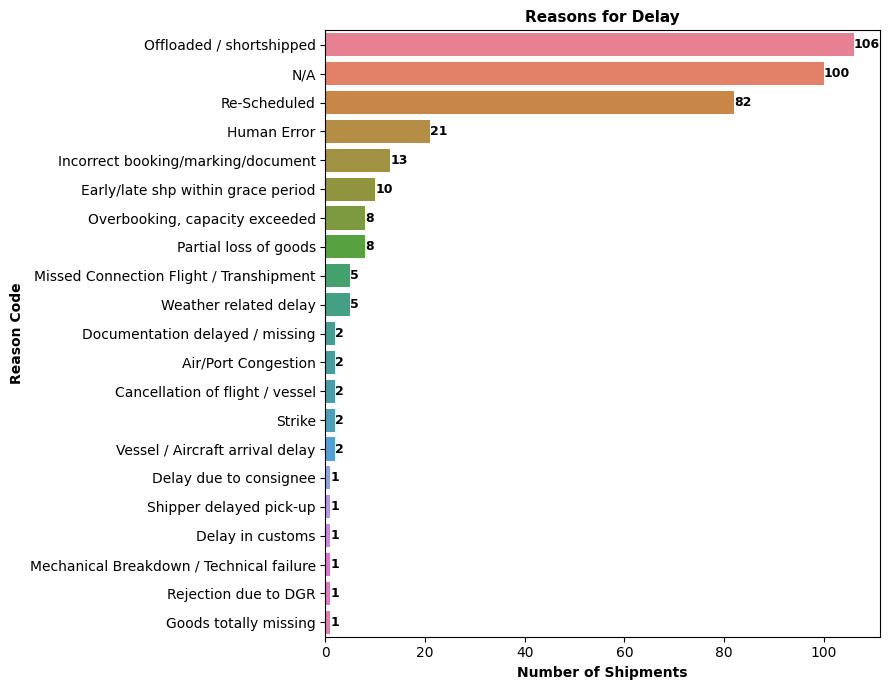

In [16]:
# Calculate the deviation reason summary for delayed shipments
deviation_reason_summary = delayed_shipments['ReasonCode'].value_counts().reset_index()
deviation_reason_summary.columns = ['ReasonCode', 'Count']

# Plot the bar chart
plt.figure(figsize=(9, 7))
sns.set_palette("colorblind")
sns.barplot(x='Count', y='ReasonCode', data=deviation_reason_summary, hue='ReasonCode', dodge=False, legend=False)
plt.title('Reasons for Delay', fontsize=11, fontweight='bold')
plt.xlabel('Number of Shipments', fontsize=10,fontweight='bold')
plt.ylabel('Reason Code', fontsize=10, fontweight='bold')

# Add values on the bars
for index, value in enumerate(deviation_reason_summary['Count']):
    plt.text(value, index, str(value), va='center', ha='left', fontsize=9, color='black', fontweight='bold')

plt.tight_layout()
plt.show()

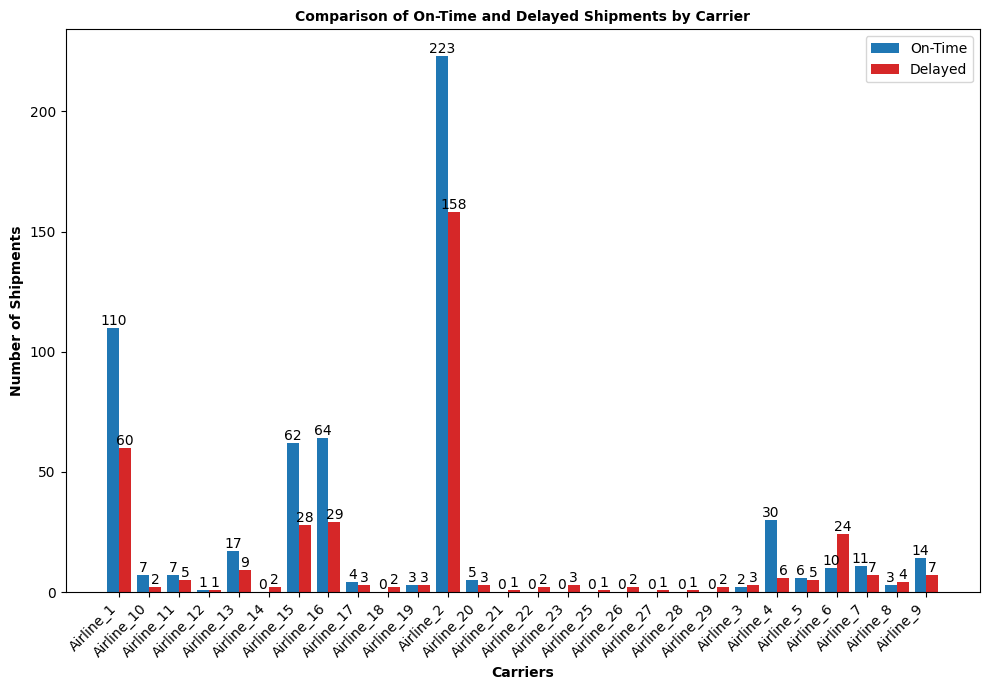

In [17]:
# Filter carriers with delayed shipments
delayed_carriers = AirShipments_DK[AirShipments_DK['Ontime'] == False]['CarrierName'].unique()

# Filter the DataFrame to include only carriers with delayed shipments
filtered_shipments = AirShipments_DK[AirShipments_DK['CarrierName'].isin(delayed_carriers)]

# Calculate the number of delayed and on-time shipments for each carrier
shipment_counts = filtered_shipments.groupby(['CarrierName', 'Ontime']).size().unstack(fill_value=0)

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 7))

# Define the bar width
bar_width = 0.4

# Create positions for the bars
r1 = np.arange(len(shipment_counts))
r2 = [x + bar_width for x in r1]

# Plot bars
bars1 = ax.bar(r1, shipment_counts[True], color='#1f77b4', width=bar_width, label='On-Time')
bars2 = ax.bar(r2, shipment_counts[False], color='#d62728', width=bar_width, label='Delayed')

# Add labels and title
ax.set_xlabel('Carriers', fontsize=10, fontweight='bold')
ax.set_ylabel('Number of Shipments', fontsize=10, fontweight='bold')
ax.set_title('Comparison of On-Time and Delayed Shipments by Carrier', fontsize=10,fontweight='bold')
ax.set_xticks([r + bar_width / 2 for r in range(len(shipment_counts))])
ax.set_xticklabels(shipment_counts.index, rotation=45, ha='right')

# Add legend
ax.legend()

# Add numbers on the bars
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center', fontsize=10, color='black')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

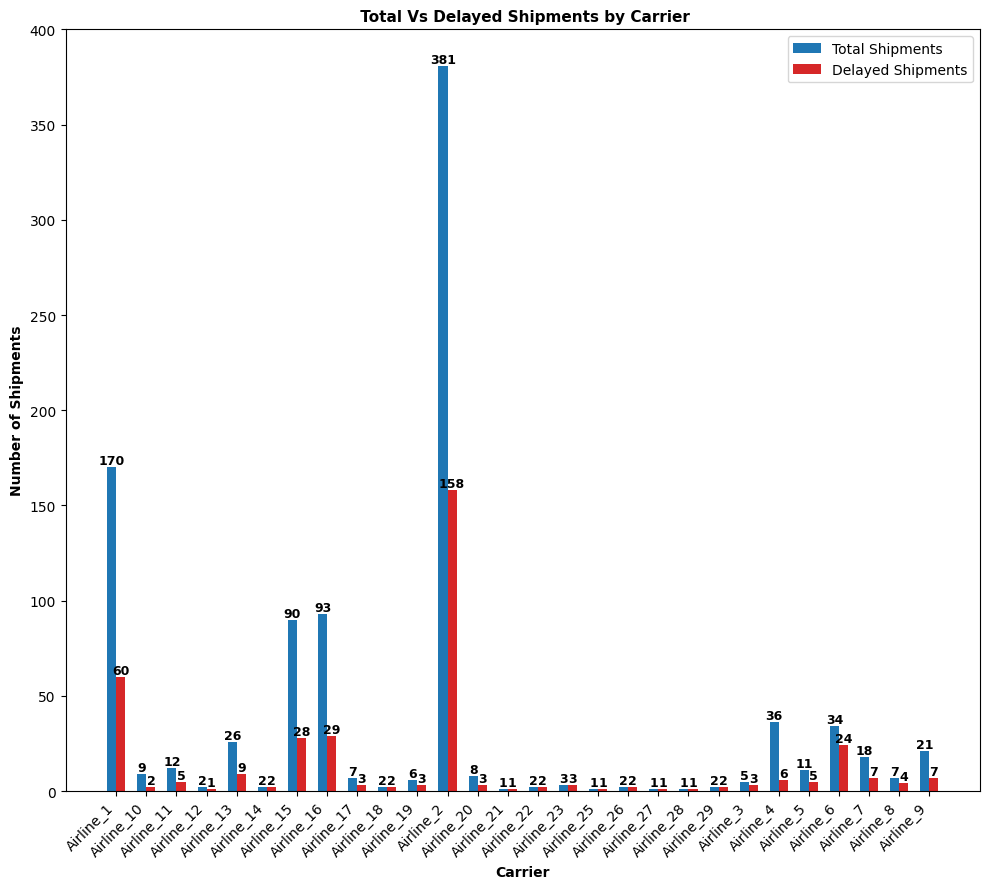

In [18]:
# Filter carriers with delayed shipments
delayed_carriers = AirShipments_DK[AirShipments_DK['Ontime'] == False]['CarrierName'].unique()

# Filter the DataFrame to include only carriers with delayed shipments
filtered_shipments = AirShipments_DK[AirShipments_DK['CarrierName'].isin(delayed_carriers)]

# Calculate the number of delayed and total shipments for each carrier
shipment_counts = filtered_shipments.groupby(['CarrierName']).size().reset_index(name='TotalShipments')
delayed_counts = filtered_shipments[filtered_shipments['Ontime'] == False].groupby(['CarrierName']).size().reset_index(name='DelayedShipments')

# Merge the total shipments and delayed shipments dataframes
merged_counts = pd.merge(shipment_counts, delayed_counts, on='CarrierName')

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 9))

#  bar width
bar_width = 0.3

# positions for the bars
r1 = np.arange(len(merged_counts))
r2 = [x + bar_width for x in r1]

# Plotting 
bars1 = ax.bar(r1, merged_counts['TotalShipments'], color='#1f77b4', width=bar_width, label='Total Shipments')
bars2 = ax.bar(r2, merged_counts['DelayedShipments'], color='#d62728', width=bar_width, label='Delayed Shipments')

# labels and title
ax.set_xlabel('Carrier', fontsize=10, fontweight='bold')
ax.set_ylabel('Number of Shipments', fontsize=10,fontweight='bold')
ax.set_title(' Total Vs Delayed Shipments by Carrier', fontsize=11, fontweight='bold')
ax.set_xticks([r + bar_width / 2 for r in range(len(merged_counts))])
ax.set_xticklabels(merged_counts['CarrierName'], rotation=45, ha='right')

#  legend
ax.legend()

#values on the bars
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center', fontsize=9, color='black', fontweight='bold')

plt.tight_layout()
plt.show()


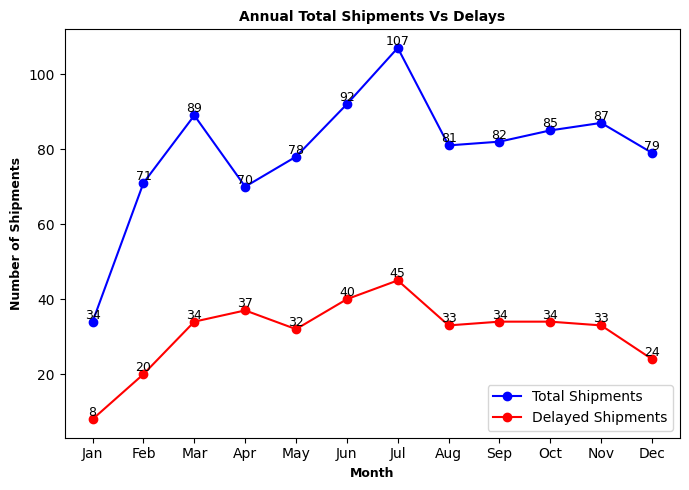

In [19]:
# Converting estimate time of Delivery column to datetime
AirShipments_DK['ETD'] = pd.to_datetime(AirShipments_DK['ETD'])

# Extract month  and create a new column for month names
AirShipments_DK['Month'] = AirShipments_DK['ETD'].dt.strftime('%b')

# Creating a list to ensure correct order
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# total shipments per month
total_shipments_per_month = AirShipments_DK['Month'].value_counts().reindex(months_order, fill_value=0)

# delayed shipments per month
delayed_shipments_per_month = AirShipments_DK[AirShipments_DK['Ontime'] == False]['Month'].value_counts().reindex(months_order, fill_value=0)

# line chart
plt.figure(figsize=(7, 5))

# total shipments line
plt.plot(total_shipments_per_month.index, total_shipments_per_month.values, marker='o', label='Total Shipments', color='blue')

# delayed shipments line
plt.plot(delayed_shipments_per_month.index, delayed_shipments_per_month.values, marker='o', label='Delayed Shipments', color='red')

#values on the lines
for i, value in enumerate(total_shipments_per_month.values):
    plt.text(i, value, str(value), va='bottom', ha='center', fontsize=9, color='black')

for i, value in enumerate(delayed_shipments_per_month.values):
    plt.text(i, value, str(value), va='bottom', ha='center', fontsize=9, color='black')

# titles and labels
plt.title('Annual Total Shipments Vs Delays', fontsize=10,fontweight='bold')
plt.xlabel('Month', fontsize=9, fontweight='bold')
plt.ylabel('Number of Shipments', fontsize=9, fontweight='bold')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


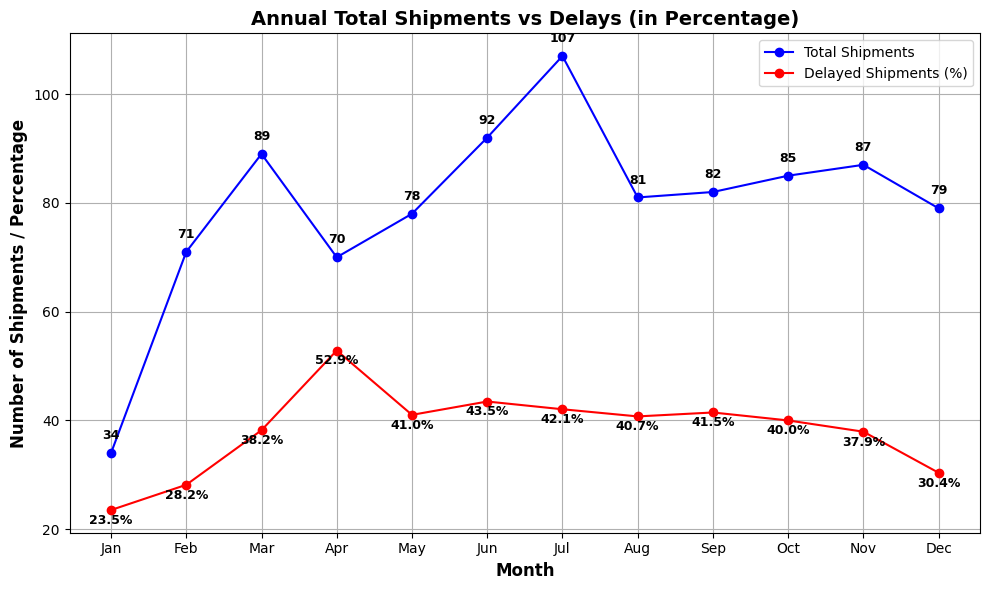

In [20]:

# Total shipments per month
total_shipments_per_month = AirShipments_DK['Month'].value_counts().reindex(months_order, fill_value=0)

# Delayed shipments per month 
delayed_shipments_per_month = AirShipments_DK[AirShipments_DK['Ontime'] == False]['Month'].value_counts().reindex(months_order, fill_value=0)

# Calculating percentage of delayed shipments
percentage_delayed_per_month = (delayed_shipments_per_month / total_shipments_per_month) * 100

# Plotting the line chart
plt.figure(figsize=(10, 6))

# Total shipments line
plt.plot(total_shipments_per_month.index, total_shipments_per_month.values, marker='o', label='Total Shipments', color='blue')

# Percentage of delayed shipments line
plt.plot(percentage_delayed_per_month.index, percentage_delayed_per_month.values, marker='o', label='Delayed Shipments (%)', color='red')

# Values on the lines
for i, value in enumerate(total_shipments_per_month.values):
    plt.annotate(str(value), (i, value), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='black',fontweight='bold')

for i, value in enumerate(percentage_delayed_per_month.values):
    plt.annotate(f'{value:.1f}%', (i, value), textcoords="offset points", xytext=(0, -10), ha='center', fontsize=9, color='black',fontweight='bold')

# Titles and labels
plt.title('Annual Total Shipments vs Delays (in Percentage)', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Number of Shipments / Percentage', fontsize=12, fontweight='bold')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


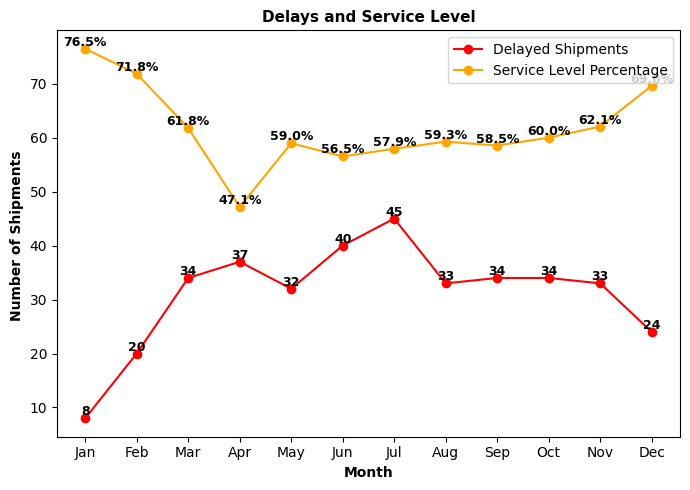

In [21]:
# Converting estimate time of Delivery column to datetime
AirShipments_DK['ETD'] = pd.to_datetime(AirShipments_DK['ETD'])

# Extract month and create a new column for month names
AirShipments_DK['Month'] = AirShipments_DK['ETD'].dt.strftime('%b')

# Creating a list to ensure correct order
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# total shipments per month
total_shipments_per_month = AirShipments_DK['Month'].value_counts().reindex(months_order, fill_value=0)
delays_per_month = AirShipments_DK[AirShipments_DK['Ontime'] == False]['Month'].value_counts().reindex(months_order, fill_value=0)

# Calculate service level percentage for each month
service_level_percentage = ((total_shipments_per_month - delays_per_month) / total_shipments_per_month) * 100

# Plot the line chart
plt.figure(figsize=(7, 5))

# Plot delayed shipments line
plt.plot(delays_per_month.index, delays_per_month.values, marker='o', label='Delayed Shipments', color='red')

# Plot service level percentage line
plt.plot(service_level_percentage.index, service_level_percentage.values, marker='o', label='Service Level Percentage', color='orange')

# Add values on the lines
for i, value in enumerate(delays_per_month.values):
    plt.text(i, value, str(value), va='bottom', ha='center', fontsize=9, color='black', fontweight='bold')

for i, value in enumerate(service_level_percentage.values):
    plt.text(i, value, f'{value:.1f}%', va='bottom', ha='center', fontsize=9, color='black', fontweight='bold')

# Add titles and labels
plt.title('Delays and Service Level', fontsize=11, fontweight='bold')
plt.xlabel('Month', fontsize=10, fontweight='bold')
plt.ylabel('Number of Shipments ', fontsize=10, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\emana\AppData\Local\Temp\ipykernel_24252\2517539341.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delayed_shipments_by_country.values, y=delayed_shipments_by_country.index, palette= "colorblind")


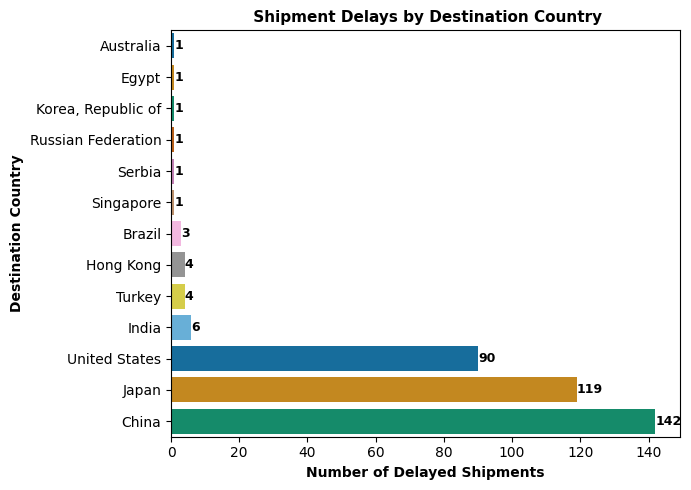

In [22]:
# Group delayed shipments by destination country and count the number of delays in each country
delayed_shipments_by_country = delayed_shipments.groupby('DestinationCountry').size().sort_values(ascending=True)

# Plot the bar chart
plt.figure(figsize=(7, 5))
sns.barplot(x=delayed_shipments_by_country.values, y=delayed_shipments_by_country.index, palette= "colorblind")

# Add values beside the bars
for index, value in enumerate(delayed_shipments_by_country.values):
    plt.text(value, index, str(value), va='center', ha='left', fontsize=9,fontweight='bold')

# Add titles and labels
plt.title(' Shipment Delays by Destination Country', fontsize=11,fontweight='bold')
plt.xlabel('Number of Delayed Shipments', fontsize=10,fontweight='bold')
plt.ylabel('Destination Country', fontsize=10,fontweight='bold')

plt.tight_layout()
plt.show()


In [23]:

carrier_countries = AirShipments_DK.groupby('CarrierName')['DestinationCountry'].unique().reset_index()
# Rename the columns for better readability
carrier_countries.columns = ['CarrierName', 'CountriesShippedTo']

# Convert the list of countries to a string for better display
carrier_countries['CountriesShippedTo'] = carrier_countries['CountriesShippedTo'].apply(lambda x: ', '.join(x))

# Display the DataFrame
print(carrier_countries)



   CarrierName                                 CountriesShippedTo
0    Airline_1  Japan, China, India, Hong Kong, Korea, Republi...
1   Airline_10                              Turkey, China, Serbia
2   Airline_11  Russian Federation, Hong Kong, China, Japan, C...
3   Airline_12                                              China
4   Airline_13                     India, Japan, Hong Kong, China
5   Airline_14                                              China
6   Airline_15                    Brazil, Japan, China, Singapore
7   Airline_16                  Japan, China, Thailand, Australia
8   Airline_17                               Japan, China, Brazil
9   Airline_18                                       China, India
10  Airline_19                              Brazil, United States
11   Airline_2  United States, Japan, China, India, Hong Kong,...
12  Airline_20                                              China
13  Airline_21                                              China
14  Airlin

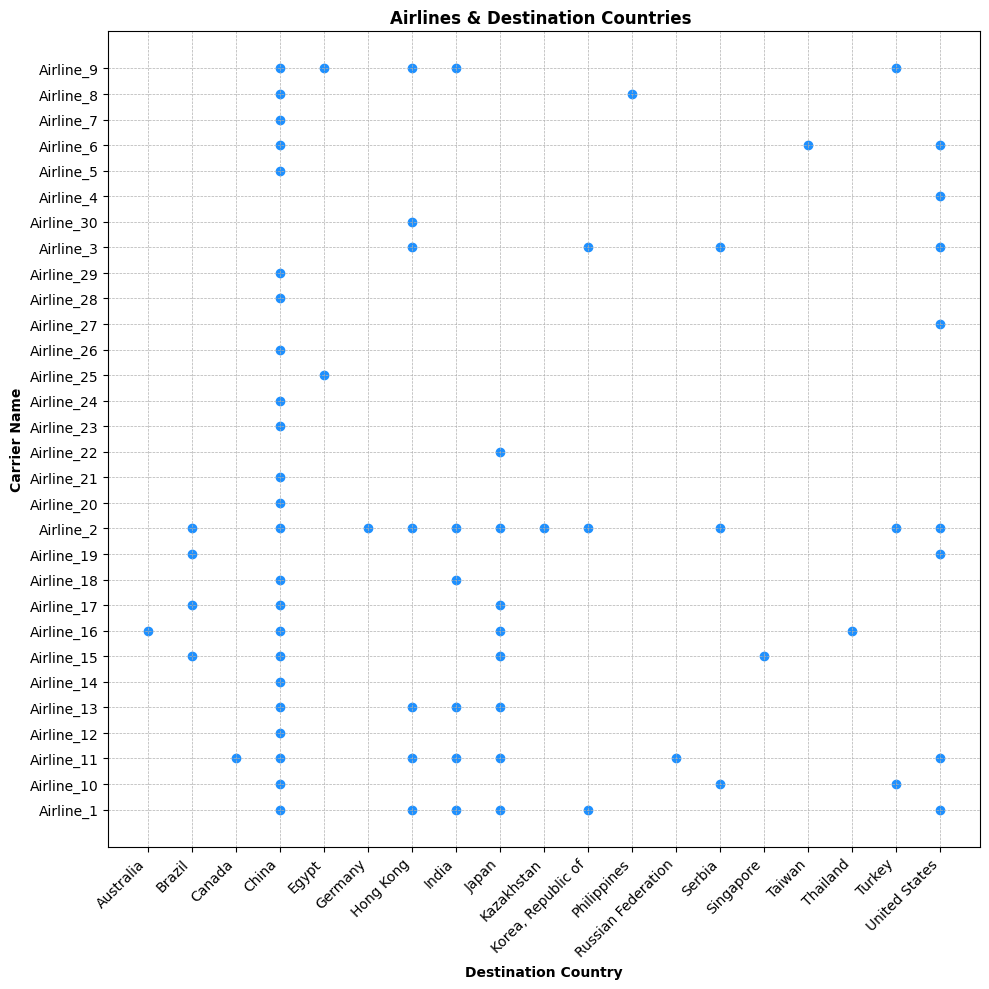

In [24]:
# pivot table 
pivot_table =AirShipments_DK .pivot_table(index='CarrierName', columns='DestinationCountry', aggfunc='size', fill_value=0)
binary_pivot_table = pivot_table.map(lambda x: 1 if x > 0 else 0)


plt.figure(figsize=(10, 10))

for i, carrier in enumerate(binary_pivot_table.index):
    for j, country in enumerate(binary_pivot_table.columns):
        if binary_pivot_table.loc[carrier, country] == 1:
            plt.scatter(j, i, color='dodgerblue')

#titles and labels
plt.title('Airlines & Destination Countries ', fontsize=12, fontweight='bold')
plt.xlabel('Destination Country', fontsize=10, fontweight='bold')
plt.ylabel('Carrier Name', fontsize=10, fontweight='bold')
plt.xticks(ticks=range(len(binary_pivot_table.columns)), labels=binary_pivot_table.columns, rotation=45, ha='right')
plt.yticks(ticks=range(len(binary_pivot_table.index)), labels=binary_pivot_table.index)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)


plt.tight_layout()
plt.show()


In [27]:
AirShipments_DK.columns

Index(['ShipmentNo', 'TransportMode', 'ContainerMode',
       'ServiceLevelDescription', 'CarrierName', 'OriginCountry',
       'DestinationCountry', 'ETD', 'ETA', 'LeadtimeService', 'AgreedLeadtime',
       'AgreedVsActualLeadtime', 'Ontime', 'DeviationCode', 'ReasonCode',
       'DeviationText', 'DeviationCreatedDate', 'Currency_Code',
       'Total Amount ', 'ActualWeight ', 'Month'],
      dtype='object')